1.DATA EXPLORING AND PREPROCESSING

IMPORTING THE CSV AND LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/TASK-ML-INTERN.csv')
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [5]:
df.shape

(500, 450)

CHECKING FOR NULL VALUES

In [6]:
null_values=df.isnull().sum().sum()
null_values

0

DROPPING THE ID COLUMN(AS ITS OF NO USE)

In [7]:
df=df.drop(columns='hsi_id')

CHECKINGT THE DISTRIBUTION OF VOMITOXIN

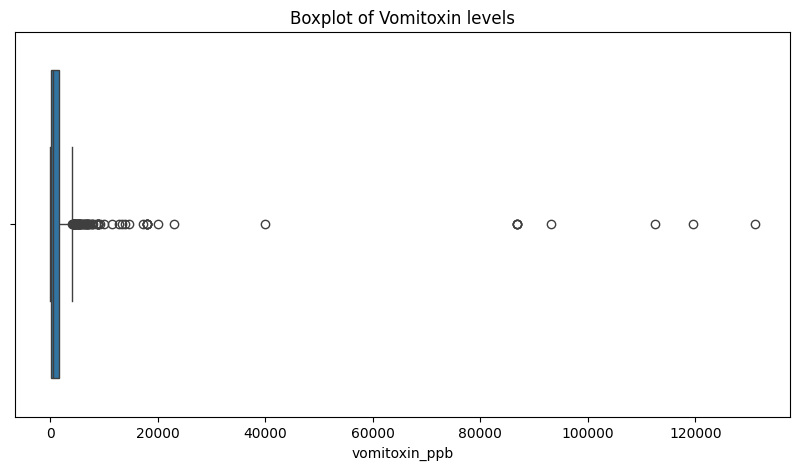

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['vomitoxin_ppb'])
plt.title("Boxplot of Vomitoxin levels")
plt.show()

SEEING THE DISTRIBUTION OF FIRST 5 FEATURES

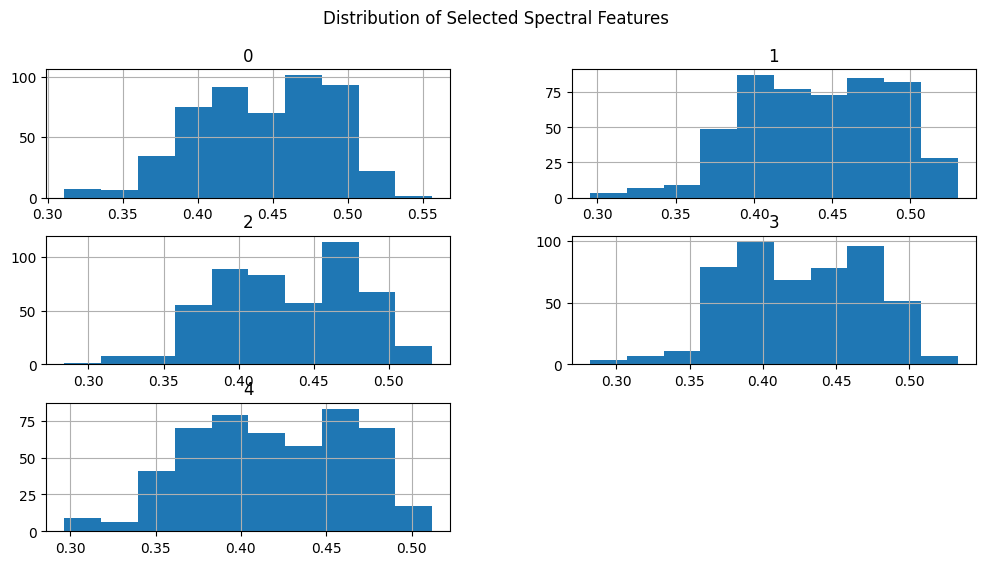

In [9]:
df.iloc[:,:5].hist(figsize=(12,6))
plt.suptitle("Distribution of Selected Spectral Features")
plt.show()

In [13]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


SCALING(EVEN THOUGH IT SEEMS SCALED)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df.iloc[:,:-1]=scaler.fit_transform(df.iloc[:, :-1])

In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0.428384,0.432294,0.510485,0.361585,0.411656,0.365379,0.382911,0.305546,0.382076,0.475299,...,0.390543,0.372789,0.411477,0.372650,0.330556,0.324067,0.376234,0.340562,0.359537,1100.0
1,0.426816,0.458322,0.484244,0.453758,0.466945,0.478181,0.467686,0.401405,0.506341,0.466313,...,0.321045,0.315913,0.377114,0.346713,0.342318,0.282899,0.335534,0.337359,0.320439,1000.0
2,0.317584,0.323124,0.363833,0.365593,0.299035,0.292418,0.294413,0.246585,0.314003,0.296242,...,0.318514,0.237159,0.275166,0.291190,0.275842,0.225416,0.228563,0.265252,0.260075,1300.0
3,0.643212,0.757663,0.731006,0.705884,0.766564,0.804758,0.809852,0.703279,0.683790,0.719998,...,0.476533,0.410269,0.468494,0.441426,0.479585,0.446448,0.463770,0.501336,0.432737,1300.0
4,0.702433,0.817355,0.756362,0.818619,0.777502,0.764411,0.809995,0.764764,0.730135,0.802499,...,0.549142,0.529060,0.533219,0.534680,0.509626,0.461215,0.556841,0.517629,0.479541,220.0


PREPARING TO PLOT THE MEAN SPECTRAL REFLECTANCE(TO GAIN MORE INSIGHTS)

In [16]:
mean_spectral_reflectance=df.iloc[:, :-1].mean() #FINDING MEAN REFLECTANCE
mean_spectral_reflectance

,0
0,0.538283
1,0.619298
2,0.611948
3,0.573639
4,0.568235
...,...
443,0.448041
444,0.447094
445,0.452088
446,0.453203


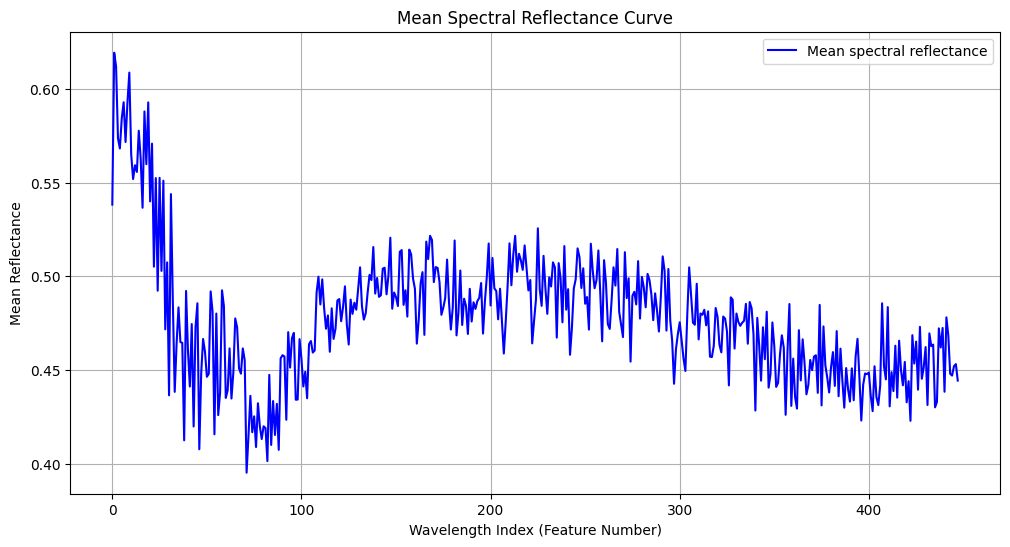

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(mean_spectral_reflectance)),mean_spectral_reflectance,label='Mean spectral reflectance',color='blue')
plt.xlabel("Wavelength Index (Feature Number)")
plt.ylabel("Mean Reflectance")
plt.title("Mean Spectral Reflectance Curve")
plt.legend()
plt.grid(True)
plt.show()

PLOTTING A CURVE BETWEEN HIGH AND LOW DON CONCENTRATION TO SEE HOW BOTH VARY WITH DIFFERENT WAVELENGTH


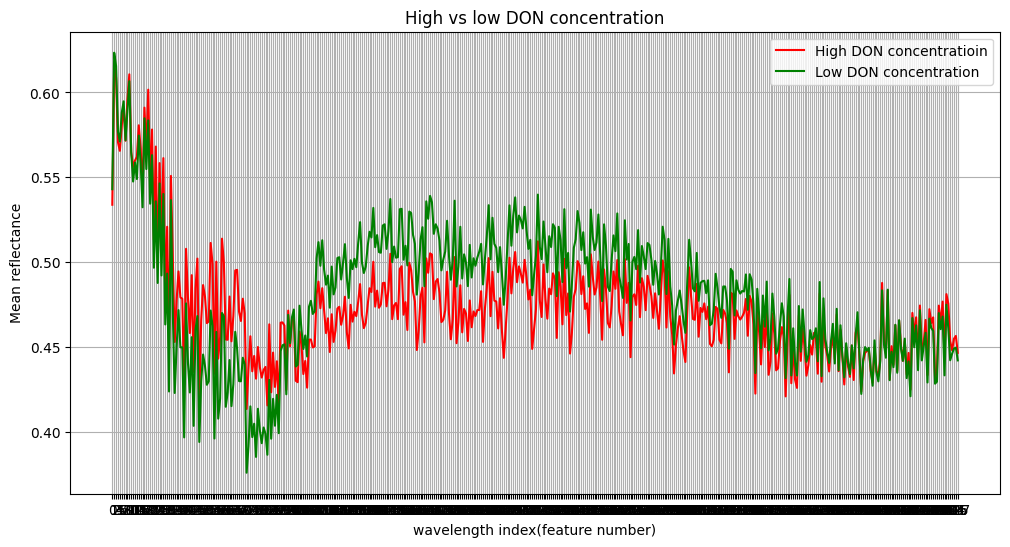

In [18]:
median_vomitoxin=df['vomitoxin_ppb'].median() #FINDING THE MEDIAN
high_don=df[df['vomitoxin_ppb']>=median_vomitoxin].iloc[:,:-1].mean()
low_don=df[df['vomitoxin_ppb']<median_vomitoxin].iloc[:,:-1].mean()
plt.figure(figsize=(12,6))
plt.plot(high_don,label="High DON concentratioin",color='red') #PLOTTING
plt.plot(low_don,label="Low DON concentration",color='green')
plt.xlabel("wavelength index(feature number)")
plt.ylabel("Mean reflectance")
plt.title("High vs low DON concentration")
plt.grid(True)
plt.legend()
plt.show()

PLOTTING A CORRELATION MATRIX BETWEEN ALL FEATURES AND VOMITOXIN

In [19]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x786c627a1800> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x786c6277b1a0> (for post_execute):


KeyboardInterrupt: 

FINDING THE TOP 10 CORRELATED FEATURES

In [20]:
feature_correlations=df.corr()['vomitoxin_ppb'].drop('vomitoxin_ppb').sort_values(ascending=False)
top_10_features=feature_correlations.abs().nlargest(10)
top_10_features

,vomitoxin_ppb
140,0.313444
135,0.307941
127,0.303796
143,0.302372
149,0.300649
146,0.300369
120,0.299075
152,0.298384
139,0.298224
129,0.298195


2.DIMENSIONALITY REDUCTION

USING PCA TO REDUCE DIMESNIONS(2) AND SEE HOW MUCH VARIANCE THESE TWO CAPTURE

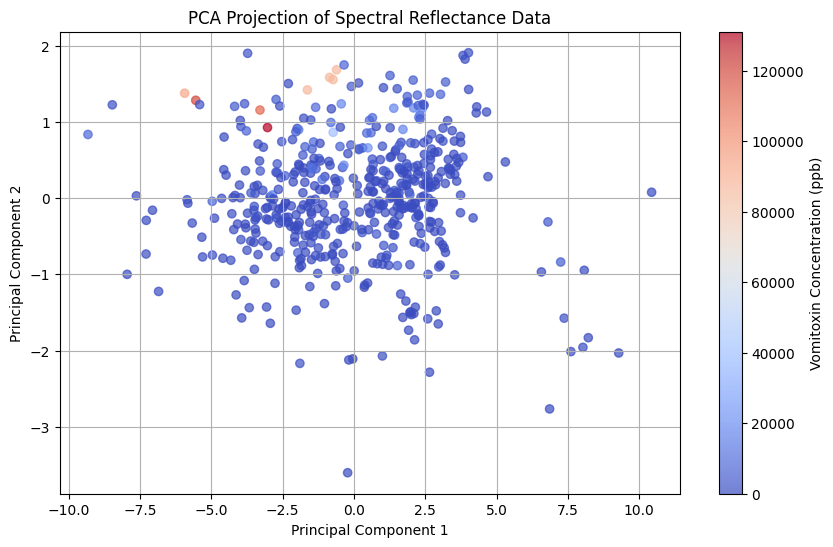

In [21]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_result=pca.fit_transform(df.iloc[:,:-1]) #PROJECTING THE ORIGINAL DATA IN THIS NEW 2D SPACE(WHILE EXCLUDING THE TARGET VARIABLE)
explained_variance = pca.explained_variance_ratio_
pca_df=pd.DataFrame({'PC1': pca_result[:,0],'PC2': pca_result[:,1],'vomitoxin_ppb': df['vomitoxin_ppb']})
plt.figure(figsize=(10, 6))
plot = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['vomitoxin_ppb'], cmap='coolwarm', alpha=0.7) #PLOTTING
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(plot, label="Vomitoxin Concentration (ppb)")
plt.title("PCA Projection of Spectral Reflectance Data")
plt.grid(True)
plt.show()




In [22]:
explained_variance #DISPLAYING THE VARIANCE CAPTURED BY THESE TWO COMPONENTS

array([0.8582386 , 0.06683037])

FINDING THE TOP 10 FEATURES THAT CONTRIBUTES TO THESE TWO PCA COMPONENTS

In [48]:
pca_full = PCA(n_components=10) #INITIALISING PCA WITH 10 COMPONENTS
pca_full.fit(df.iloc[:, :-1])  #EXCLUDING THE TARGET VARIABLE
pc1_importance = abs(pca_full.components_[0]) #GETTING THE CONTRIBUTION OF THE 10 FEATURES IN PC1
top_features_indices = pc1_importance.argsort()[::-1][:10]
top_features=pd.DataFrame({"Feature Index":top_features_indices,"Contribution to PC1":pc1_importance[top_features_indices]}) #CREATING A DF
top_features.head(10)

,Feature Index,Contribution to PC1
0,9,0.059059
1,7,0.058843
2,11,0.058316
3,10,0.058197
4,4,0.057702
5,5,0.057541
6,13,0.057448
7,12,0.055553
8,14,0.054955
9,341,0.054214


FINDING THEIR CORRELATION WITH TARGET

   Feature Index  Correlation with Target
0              9                -0.021581
1              7                -0.044674
2             11                -0.032310
3             10                -0.038275
4              4                -0.085876
5              5                -0.057492
6             13                -0.035052
7             12                -0.061969
8             14                -0.031515
9            341                -0.115692


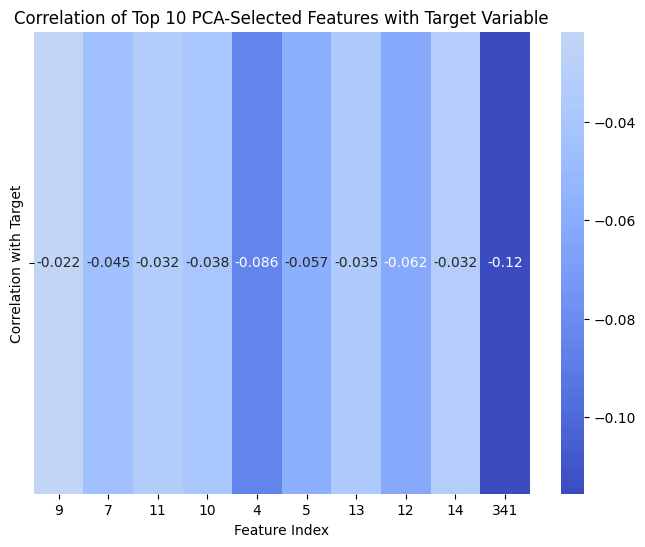

In [49]:
top_features=df.iloc[:,top_features_indices] #EXTRACTCING THE TOP FEATURES FROM MAIN DF
correlation_with_target=top_features.corrwith(df['vomitoxin_ppb']) #COMPUTING THE CORRELATION WITH TARGET VARIABLE
correlation_df=pd.DataFrame({"Feature Index": top_features_indices,"Correlation with Target": correlation_with_target.values})
print(correlation_df)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_df.set_index("Feature Index").T,cmap="coolwarm",annot=True,center=0)
plt.title("Correlation of Top 10 PCA-Selected Features with Target Variable")
plt.show()


NOW CHECKING WITH TSNE FOR FURTHER INSIGHTS

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


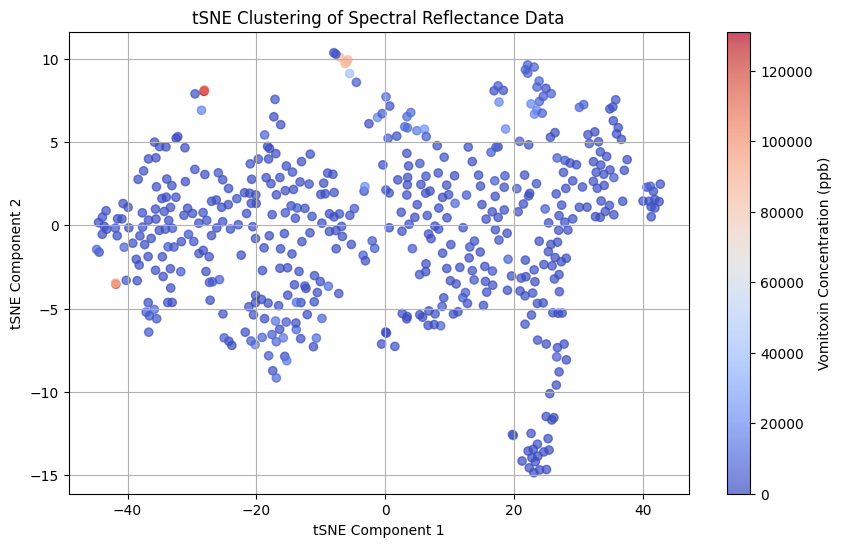

In [24]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=42,perplexity=30,n_iter=1000)
tsne_result=tsne.fit_transform(df.iloc[:, :-1]) #EXCLUDE THE TARGET VARIABLE
tsne_df = pd.DataFrame({'TSNE1': tsne_result[:, 0],'TSNE2': tsne_result[:, 1],'vomitoxin_ppb': df['vomitoxin_ppb']}) #CREATING A DF
plt.figure(figsize=(10,6))
scatter = plt.scatter(tsne_df['TSNE1'],tsne_df['TSNE2'],c=tsne_df['vomitoxin_ppb'],cmap='coolwarm',alpha=0.7)#PLOTTING
plt.colorbar(scatter, label="Vomitoxin Concentration (ppb)")
plt.xlabel("tSNE Component 1")
plt.ylabel("tSNE Component 2")
plt.title("tSNE Clustering of Spectral Reflectance Data")
plt.grid(True)
plt.show()


FINDING TOP 10 FEATURES USING RANDOM FOREST REGRESSOR

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100,random_state=42) #TRAINGING A RANDOM FOREST MODEL FOR SELCTING THE TOP FEATURES
rf_model.fit(df.iloc[:,:-1],df['vomitoxin_ppb'])
feature_importances=rf_model.feature_importances_
top_features_indices=np.argsort(feature_importances)[::-1][:10] #SORTING
important_features_df=pd.DataFrame({"Feature Index": top_features_indices,"Importance Score": feature_importances[top_features_indices]}) #STORING IN A DF
important_features_df.head(10)

,Feature Index,Importance Score
0,149,0.074117
1,136,0.069700
2,159,0.048671
3,123,0.043664
4,48,0.032713
5,160,0.032143
6,127,0.030841
7,140,0.017967
8,137,0.017011
9,124,0.015988


FINDING CORRELATION OF THESE TOP 10 FEATURES WITH TARGET VARIABLE

In [62]:
top_rf_feature_indices=[149,136,159,123,48,160,127,140,137,124] #MAKING A LIST OF TOP 10 FEATURES
rf_features_correlation=df.iloc[:, top_rf_feature_indices].corrwith(df['vomitoxin_ppb'])
rf_features_correlation_df=pd.DataFrame({"Feature Index": top_rf_feature_indices,"Correlation with Vomitoxin":rf_features_correlation.values}).sort_values(by="Correlation with Vomitoxin",ascending=False)
rf_features_correlation_df.head(10)

,Feature Index,Correlation with Vomitoxin
4,48,0.092803
2,159,-0.292335
8,137,-0.294551
9,124,-0.295049
1,136,-0.295601
5,160,-0.296617
3,123,-0.296665
0,149,-0.300649
6,127,-0.303796
7,140,-0.313444


In [63]:

# Compute correlation of each feature with vomitoxin levels
feature_correlations = df.corr()['vomitoxin_ppb'].drop('vomitoxin_ppb').abs().sort_values(ascending=False)

# Select the top 10 most correlated features
top_10_features = feature_correlations.head(50)

# Convert to DataFrame for better readability
top_10_features_df = pd.DataFrame({
    "Feature Index": top_10_features.index,
    "Correlation with Vomitoxin": top_10_features.values
})

# Print the top correlated features
print(top_10_features_df)


   Feature Index  Correlation with Vomitoxin
0            140                    0.313444
1            135                    0.307941
2            127                    0.303796
3            143                    0.302372
4            149                    0.300649
5            146                    0.300369
6            120                    0.299075
7            152                    0.298384
8            139                    0.298224
9            129                    0.298195
10           132                    0.297791
11           144                    0.297652
12           130                    0.297410
13           123                    0.296665
14           160                    0.296617
15           128                    0.296284
16           136                    0.295601
17           133                    0.295126
18           124                    0.295049
19           137                    0.294551
20           145                    0.293487
21        

NEURAL NETWORK WITH ALL FEATURES

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 199581120.0000 - mae: 3376.3894 - val_loss: 298696928.0000 - val_mae: 4383.5747
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 160954896.0000 - mae: 3341.7991 - val_loss: 296021472.0000 - val_mae: 4266.8252
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 160103968.0000 - mae: 3072.1035 - val_loss: 290044288.0000 - val_mae: 4860.7793
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 244288048.0000 - mae: 4911.0693 - val_loss: 288540096.0000 - val_mae: 5261.5063
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 140859728.0000 - mae: 3583.1541 - val_loss: 289132096.0000 - val_mae: 5000.8926
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 132111688.0000 - mae: 3605.9524 - val_loss: 288195968.0000 - val_mae: 5263.4951
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 124965616.0000 - mae: 3599.5596 - val_loss: 288141728.0000 - val_mae: 5202.7686
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━

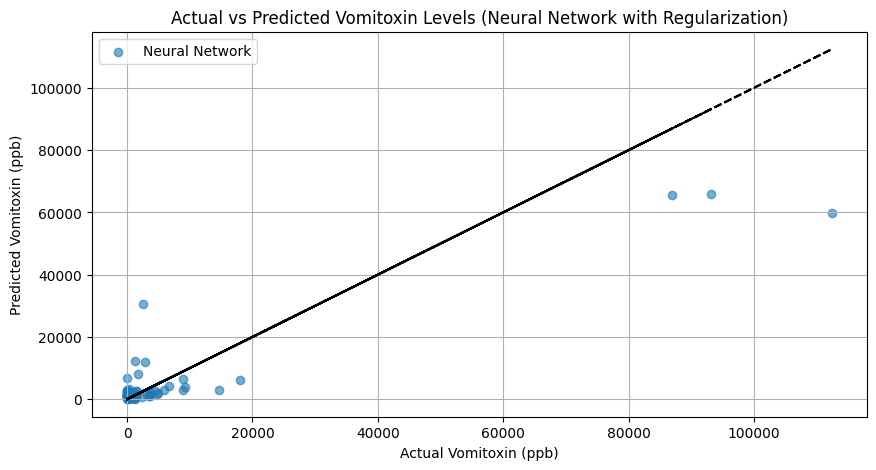

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Normalize all spectral features
scaler = MinMaxScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Define input features (X) and target variable (y)
X = df.iloc[:, :-1]  # Use all 477 spectral features
y = df['vomitoxin_ppb']

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Neural Network Model with Dropout and L2 Regularization
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],),
                       kernel_regularizer=keras.regularizers.l2(0.001)),  # L2 Regularization
    keras.layers.Dropout(0.3),  # Dropout layer to prevent overfitting
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=16, callbacks=[early_stopping], verbose=1)

# Make predictions
nn_preds = model.predict(X_test).flatten()

# Evaluate the Neural Network Model
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\nModel: {model_name}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

evaluate_model(y_test, nn_preds, "Neural Network with Regularization")

# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, nn_preds, label="Neural Network", alpha=0.6)
plt.plot(y_test, y_test, color='black', linestyle='dashed')  # Perfect prediction line
plt.xlabel("Actual Vomitoxin (ppb)")
plt.ylabel("Predicted Vomitoxin (ppb)")
plt.title("Actual vs Predicted Vomitoxin Levels (Neural Network with Regularization)")
plt.legend()
plt.grid(True)
plt.show()


In [67]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.5 MB/s eta 0:00:00


NEURAL NETWORK WITH HYPERPARAMETER TUNING USING RANDOM SEARCH

Trial 20 Complete [00h 00m 35s]
val_loss: 39673098.0

Best val_loss So Far: 37491740.0
Total elapsed time: 00h 19m 20s
Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 103636352.0000 - mae: 3136.4023 - val_loss: 288479360.0000 - val_mae: 4922.1504
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 181345056.0000 - mae: 4453.7251 - val_loss: 293285984.0000 - val_mae: 4265.2759
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 137382544.0000 - mae: 3406.0312 - val_loss: 283562816.0000 - val_mae: 5265.1182
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 105149120.0000 - mae: 3015.4817 - val_loss: 280556672.0000 - val_mae: 5474.6626
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 134771456.0000 - mae: 3541.5371 - val_loss: 273468736.0000 - val_mae: 4524.7886
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 240816400.0000 - mae: 4309.5430 - val_loss: 250299600.0000 - val_mae: 7109.8101
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 225270208.0000 - mae: 5322.4502 - val_loss: 275562176.0000 - val_mae: 4211.7705
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Model: Optimized Neural Network
MAE: 2355.8723
RMSE: 5676.9481
R² Score: 0.8847


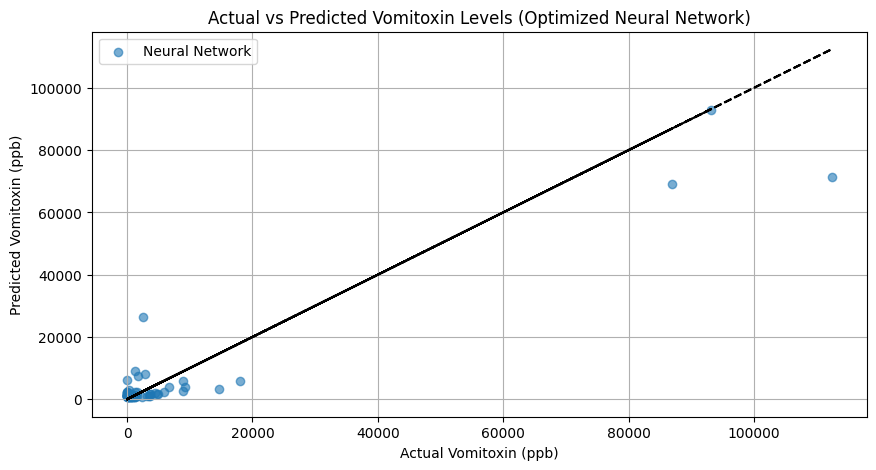

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Normalize all spectral features
scaler = MinMaxScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Define input features (X) and target variable (y)
X = df.iloc[:, :-1]  # Use all 477 spectral features
y = df['vomitoxin_ppb']

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to build the model with tunable hyperparameters
def build_model(hp):
    model = keras.Sequential()

    # First hidden layer
    model.add(keras.layers.Dense(
        units=hp.Int('units_1', min_value=64, max_value=512, step=64),
        activation='relu',
        input_shape=(X_train.shape[1],),
        kernel_regularizer=keras.regularizers.l2(hp.Choice('l2_1', [0.0001, 0.001, 0.01]))
    ))
    model.add(keras.layers.Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    # Second hidden layer
    model.add(keras.layers.Dense(
        units=hp.Int('units_2', min_value=64, max_value=256, step=64),
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(hp.Choice('l2_2', [0.0001, 0.001, 0.01]))
    ))
    model.add(keras.layers.Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    # Third hidden layer
    model.add(keras.layers.Dense(
        units=hp.Int('units_3', min_value=32, max_value=128, step=32),
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(hp.Choice('l2_3', [0.0001, 0.001, 0.01]))
    ))
    model.add(keras.layers.Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(keras.layers.Dense(1))  # Regression output

    # Compile the model with tunable learning rate
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['mae']
    )

    return model

# Use KerasTuner's Random Search to find the best hyperparameters
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,  # Number of different models to try
    executions_per_trial=2,  # Number of times each model is trained for better evaluation
    directory='tuner_results',
    project_name='vomitoxin_prediction'
)

# Run hyperparameter tuning
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, callbacks=[
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
])

# Get the best model from tuning
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=16, callbacks=[
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
], verbose=1)

# Make predictions
nn_preds = best_model.predict(X_test).flatten()

# Evaluate the best model
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\nModel: {model_name}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

evaluate_model(y_test, nn_preds, "Optimized Neural Network")

# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, nn_preds, label="Neural Network", alpha=0.6)
plt.plot(y_test, y_test, color='black', linestyle='dashed')  # Perfect prediction line
plt.xlabel("Actual Vomitoxin (ppb)")
plt.ylabel("Predicted Vomitoxin (ppb)")
plt.title("Actual vs Predicted Vomitoxin Levels (Optimized Neural Network)")
plt.legend()
plt.grid(True)
plt.show()


CNN

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - loss: 111980584.0000 - mae: 2476.0449 - val_loss: 298154112.0000 - val_mae: 4359.1099
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 96731048.0000 - mae: 2663.5210 - val_loss: 295127008.0000 - val_mae: 4240.9927
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - loss: 93306592.0000 - mae: 2673.5669 - val_loss: 292226304.0000 - val_mae: 4229.6646
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - loss: 88744240.0000 - mae: 2835.6306 - val_loss: 289778016.0000 - val_mae: 4287.4478
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 182835872.0000 - mae: 3932.1436 - val_loss: 291291264.0000 - val_mae: 4258.9868
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 196412128.0000 - mae: 3987.8689 - val_loss: 288672672.0000 - val_mae: 4272.2075
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 85878240.0000 - mae: 3023.5449 - val_loss: 290873952.0000 - val_mae: 4213.0537
Epoch 8/200
25/25 ━

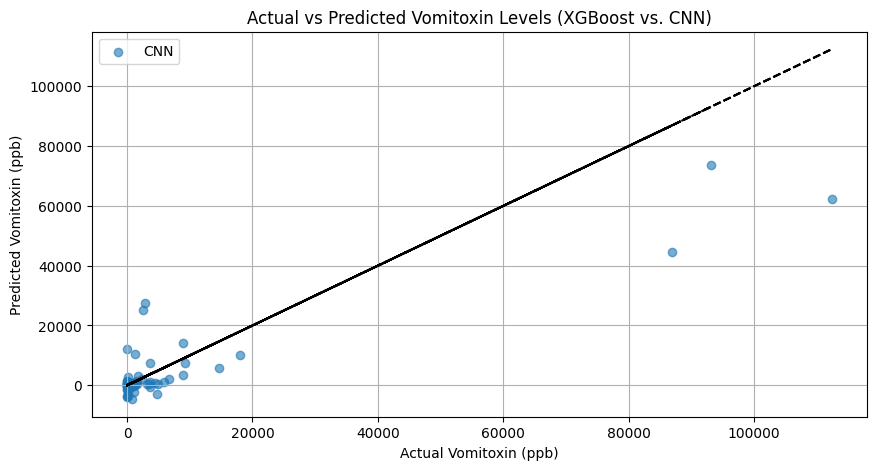

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Normalize spectral features
scaler = MinMaxScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Define input features (X) and target variable (y)
X = df.iloc[:, :-1].values  # Use all 477 features
y = df['vomitoxin_ppb'].values

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ---- CNN Model ----
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

cnn_model = keras.Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1)  # Output layer for regression
])

cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_cnn = cnn_model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=200, batch_size=16, callbacks=[early_stopping], verbose=1)

cnn_preds = cnn_model.predict(X_test_cnn).flatten()

# ---- Evaluate Models ----
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\nModel: {model_name}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# evaluate_model(y_test, xgb_preds, "XGBoost (Tuned)")
evaluate_model(y_test, cnn_preds, "CNN")

# ---- Plot Actual vs Predicted Values ----
plt.figure(figsize=(10, 5))
# plt.scatter(y_test, xgb_preds, label="XGBoost (Tuned)", alpha=0.6)
plt.scatter(y_test, cnn_preds, label="CNN", alpha=0.6)
plt.plot(y_test, y_test, color='black', linestyle='dashed')  # Perfect prediction line
plt.xlabel("Actual Vomitoxin (ppb)")
plt.ylabel("Predicted Vomitoxin (ppb)")
plt.title("Actual vs Predicted Vomitoxin Levels (XGBoost vs. CNN)")
plt.legend()
plt.grid(True)
plt.show()


OPTIMIZED CNN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.optimizers import Adam

# Load dataset

# Drop identifier column if present
if 'hsi_id' in df.columns:
    df.drop(columns=['hsi_id'], inplace=True)

# Normalize spectral features
scaler = MinMaxScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Define input features (X) and target variable (y)
X = df.iloc[:, :-1].values  # Use all 477 features
y = df['vomitoxin_ppb'].values

# Reshape X to be compatible with CNN (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)  # 1D CNN input shape

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Define CNN Hyperparameter Grid ----
kernel_sizes = [3, 5, 7]
dropout_rates = [0.2, 0.3, 0.4]
learning_rates = [0.01, 0.001, 0.0005]

best_model = None
best_score = float('-inf')  # Track the highest R² score

# ---- Perform Grid Search Over Hyperparameters ----
for kernel_size in kernel_sizes:
    for dropout_rate in dropout_rates:
        for lr in learning_rates:
            print(f"Training CNN with Kernel={kernel_size}, Dropout={dropout_rate}, Learning Rate={lr}")

            # Build CNN Model
            model = keras.Sequential([
                Conv1D(filters=64, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)),
                BatchNormalization(),
                Dropout(dropout_rate),

                Conv1D(filters=128, kernel_size=kernel_size, activation='relu'),
                BatchNormalization(),
                Dropout(dropout_rate),

                Flatten(),
                Dense(64, activation='relu'),
                Dropout(dropout_rate),

                Dense(1)  # Output layer for regression
            ])

            # Compile the Model
            optimizer = Adam(learning_rate=lr)
            model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

            # Train the model with early stopping
            early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
            history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                                epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

            # Make predictions
            cnn_preds = model.predict(X_test).flatten()

            # Evaluate the CNN Model
            mae = mean_absolute_error(y_test, cnn_preds)
            rmse = np.sqrt(mean_squared_error(y_test, cnn_preds))
            r2 = r2_score(y_test, cnn_preds)

            print(f"\nCNN (Kernel={kernel_size}, Dropout={dropout_rate}, LR={lr}) -> MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

            # Store the best model
            if r2 > best_score:
                best_score = r2
                best_model = model
                best_params = {'kernel_size': kernel_size, 'dropout_rate': dropout_rate, 'learning_rate': lr}

# ---- Final Evaluation: Best Model ----
print("\nBest CNN Hyperparameters:", best_params)

# Make final predictions with best model
final_preds = best_model.predict(X_test).flatten()

# Evaluate Best Model
mae = mean_absolute_error(y_test, final_preds)
rmse = np.sqrt(mean_squared_error(y_test, final_preds))
r2 = r2_score(y_test, final_preds)

print(f"\nFinal Best CNN Model -> MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

# ---- Plot Actual vs. Predicted Values ----
plt.figure(figsize=(10, 5))
plt.scatter(y_test, final_preds, label="Best CNN", alpha=0.6)
plt.plot(y_test, y_test, color='black', linestyle='dashed')  # Perfect prediction line
plt.xlabel("Actual Vomitoxin (ppb)")
plt.ylabel("Predicted Vomitoxin (ppb)")
plt.title("Actual vs Predicted Vomitoxin Levels (Optimized CNN)")
plt.legend()
plt.grid(True)
plt.show()


Training CNN with Kernel=3, Dropout=0.2, Learning Rate=0.01
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 185ms/step - loss: 241051680.0000 - mae: 4241.2627 - val_loss: 296470208.0000 - val_mae: 4265.5308
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - loss: 114075528.0000 - mae: 3231.7378 - val_loss: 292039296.0000 - val_mae: 4301.8838
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - loss: 103485624.0000 - mae: 3968.6521 - val_loss: 293326816.0000 - val_mae: 4234.7500
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - loss: 96627968.0000 - mae: 3460.4832 - val_loss: 295848832.0000 - val_mae: 4408.7402
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - loss: 59360808.0000 - mae: 3049.1479 - val_loss: 297322528.0000 - val_mae: 4517.0986
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - loss: 84880168.0000 - mae: 3416.5317 - val_loss: 284877856.0000 - val_mae: 4341.7998
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - loss: 55376796.0000 - mae: 3047.2222 - val_loss: 278558592.0000 - val_mae: 4096.6689
Epoch 8/100
13/13 ━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - loss: 122424024.0000 - mae: 2908.7183 - val_loss: 298944512.0000 - val_mae: 4411.0645
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - loss: 58876708.0000 - mae: 2155.6931 - val_loss: 298595136.0000 - val_mae: 4395.0142
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 173876464.0000 - mae: 3247.5708 - val_loss: 298306784.0000 - val_mae: 4382.1240
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 118425424.0000 - mae: 2975.5549 - val_loss: 297456832.0000 - val_mae: 4342.0435
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 242ms/step - loss: 159648976.0000 - mae: 3683.4912 - val_loss: 296290112.0000 - val_mae: 4292.2271
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - loss: 107610288.0000 - mae: 3156.6113 - val_loss: 296355840.0000 - val_mae: 4288.6445
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - loss: 177923008.0000 - mae: 3660.2136 - val_loss: 296479328.0000 - val_mae: 4292.1533
Epoch 8/100
13

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - loss: 143270240.0000 - mae: 3071.1929 - val_loss: 298970816.0000 - val_mae: 4411.1660
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 262ms/step - loss: 151591936.0000 - mae: 2913.7651 - val_loss: 298856000.0000 - val_mae: 4406.0210
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - loss: 146155952.0000 - mae: 3151.8728 - val_loss: 298569504.0000 - val_mae: 4394.0015
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - loss: 245132016.0000 - mae: 3982.7749 - val_loss: 297956128.0000 - val_mae: 4366.4058
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - loss: 137209264.0000 - mae: 2963.7937 - val_loss: 296789472.0000 - val_mae: 4315.1870
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - loss: 117801528.0000 - mae: 2762.7412 - val_loss: 295562848.0000 - val_mae: 4277.7598
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step - loss: 87187296.0000 - mae: 2686.2451 - val_loss: 294606880.0000 - val_mae: 4250.7319
Epoch 8/100
13/13 ━━━━━━━━

In [ ]:
# Ensure the best model variable exists
if 'best_model' in locals():
    best_model.save("optimized_cnn_model.h5")
    print("CNN Model Saved Successfully!")
else:
    print("Error: No best CNN model found. Train and assign it before saving.")


CNN Model Saved Successfully!
